<a href="https://colab.research.google.com/github/Holf/AllForOne/blob/master/prettier_and_csharpier/npm_downloads_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Prettier downloads chart

## Grab the data from NPM

Let's do this in a dedicated step and then save the result, so we don't spam NPM with requests while we play with the graph plotting.

In [2]:
import requests
import pandas as pd

!git clone https://github.com/drtrt-org/drtrt-blog-resources.git

package_name = 'prettier'
start_year = 2016
end_year = 2024

local_file_path = f'/content/npm_download_{package_name}_{start_year}_{end_year}_data.csv'

all_data = pd.DataFrame()

for year in range(start_year, end_year + 1):
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    url = f"https://api.npmjs.org/downloads/range/{start_date}:{end_date}/{package_name}"
    print(f"Downloading data from: {url}")

    # Make the request
    response = requests.get(url)
    if response.status_code == 200:
        # Load data into a DataFrame
        data = response.json()['downloads']
        df = pd.DataFrame(data)
        df['day'] = pd.to_datetime(df['day'])  # Convert to datetime
        all_data = pd.concat([all_data, df], ignore_index=True)
    else:
        print(f"Failed to retrieve data for {year}: {response.status_code}")
        continue

all_data.to_csv(local_file_path, index=False)
print(f"Data saved to '{local_file_path}'")



Cloning into 'drtrt-blog-resources'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 107.02 KiB | 26.75 MiB/s, done.
Data saved to '/content/npm_download_prettier_2016_2024_data.csv'


In [8]:
# Display contents of normalize_then_plot.ipynb
!jupyter nbconvert --to html '/content/drtrt-blog-resources/prettier_and_csharpier/normalize_then_plot.ipynb' --output '/content/temp.html'
from IPython.display import display, HTML

with open("/content/temp.html", "r") as f:
    display(HTML(f.read()))



[NbConvertApp] Converting notebook /content/drtrt-blog-resources/prettier_and_csharpier/normalize_then_plot.ipynb to html
[NbConvertApp] Writing 276855 bytes to /content/temp.html


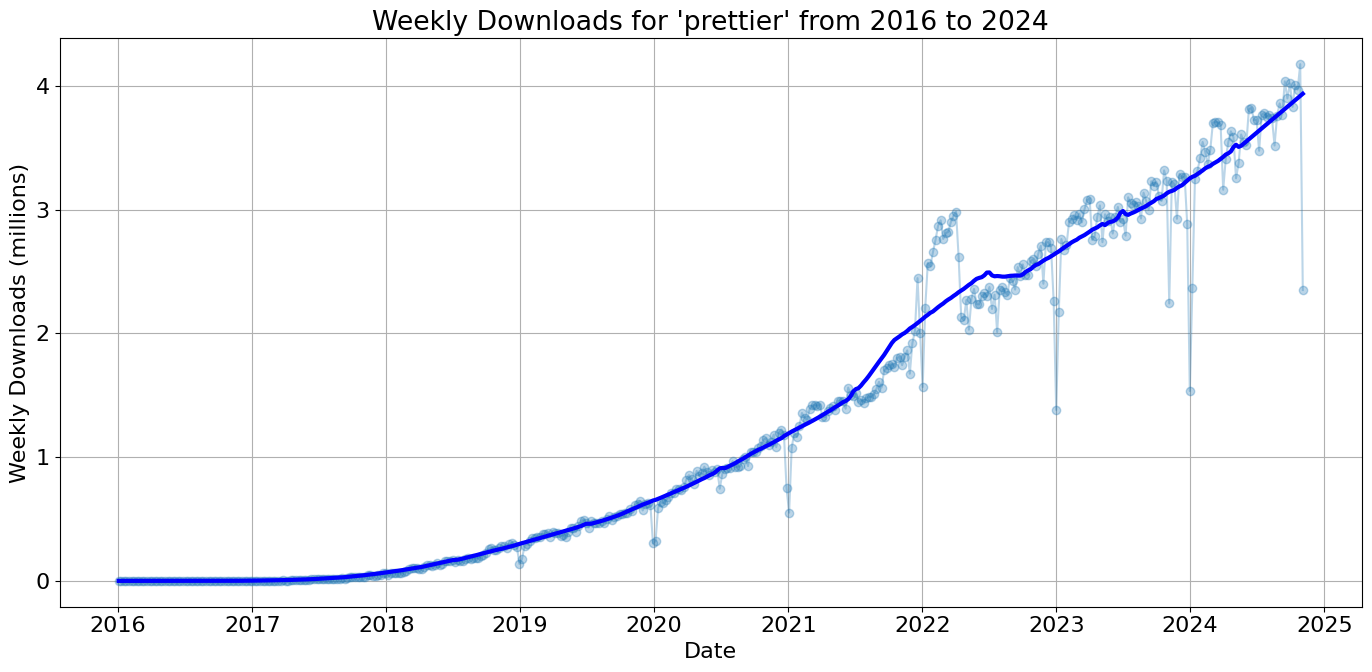

In [9]:
%run '/content/drtrt-blog-resources/prettier_and_csharpier/normalize_then_plot.ipynb'